In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
sns.set(style="darkgrid")

In [10]:

vivienda_df = pd.read_csv(r"../comprar_alquilar.csv")

print(vivienda_df.info())
display(vivienda_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ingresos        202 non-null    int64
 1   gastos_comunes  202 non-null    int64
 2   pago_coche      202 non-null    int64
 3   gastos_otros    202 non-null    int64
 4   ahorros         202 non-null    int64
 5   vivienda        202 non-null    int64
 6   estado_civil    202 non-null    int64
 7   hijos           202 non-null    int64
 8   trabajo         202 non-null    int64
 9   comprar         202 non-null    int64
dtypes: int64(10)
memory usage: 15.9 KB
None


,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0,6000,1000,0,600,50000,400000,0,2,2,1
1,6745,944,123,429,43240,636897,1,3,6,0
2,6455,1033,98,795,57463,321779,2,1,8,1
3,7098,1278,15,254,54506,660933,0,0,3,0
4,6167,863,223,520,41512,348932,0,0,3,1


ESTADISITICAS DESCRIPTIVAS:


,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4958.995050,971.584158,211.742574,515.425743,38749.668317,373349.638614,1.024752,1.232673,4.490099,0.331683
std,1682.862556,272.106351,124.940754,168.103075,17365.231870,136371.525622,0.837184,1.367833,2.535794,0.471988
min,2008.000000,384.000000,0.000000,201.000000,10319.000000,176553.000000,0.000000,0.000000,0.000000,0.000000
25%,3513.750000,766.750000,99.000000,383.250000,24964.250000,274810.000000,0.000000,0.000000,2.000000,0.000000
50%,4947.500000,968.000000,208.500000,522.500000,38523.000000,340783.500000,1.000000,1.000000,5.000000,0.000000
75%,6374.500000,1165.250000,318.750000,656.750000,52150.750000,444482.000000,2.000000,2.000000,7.000000,1.000000
max,7984.000000,1585.000000,448.000000,828.000000,69934.000000,669540.000000,2.000000,4.000000,8.000000,1.000000


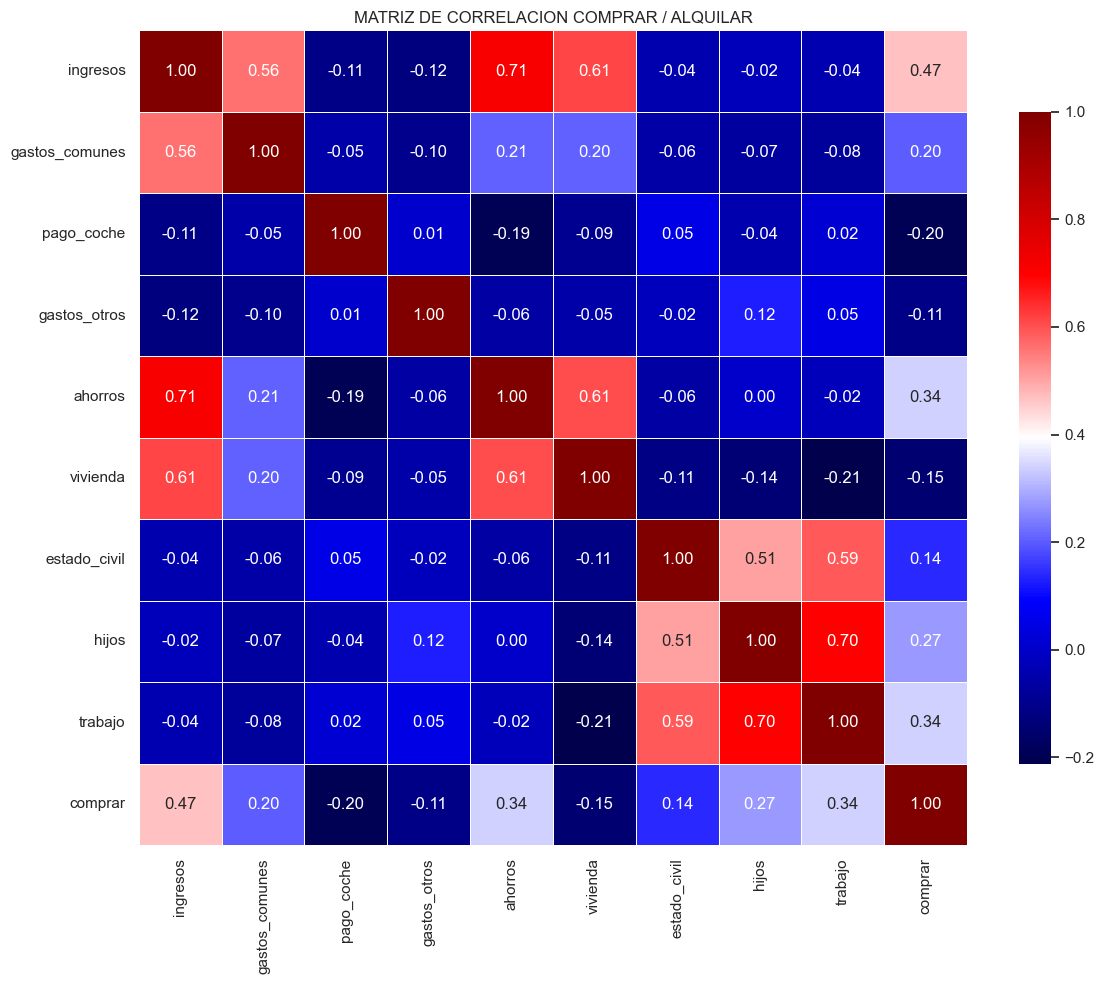

In [11]:
# Estadísticas descriptivas
print("ESTADISITICAS DESCRIPTIVAS:")
display(vivienda_df.describe())

# Visualización de correlaciones
plt.figure(figsize=(12, 10))
sns.heatmap(vivienda_df.corr(), annot=True, cmap='seismic', linewidths=0.5, cbar_kws={"shrink": .8}, fmt='.2f')
plt.title('MATRIZ DE CORRELACION COMPRAR / ALQUILAR')
plt.tight_layout()
plt.show()

In [12]:
# Variables predictoras y objetivo
X_pca = vivienda_df.drop('comprar', axis=1)
y_pca = vivienda_df['comprar']

# Escalar los datos
scaler_pca = StandardScaler()
X_scaled_pca = scaler_pca.fit_transform(X_pca)

X_pca.shape, X_scaled_pca.shape

((202, 9), (202, 9))

EXPLICACION DE VARIANZA POR COMPONENTE: [0.2991 0.2329 0.1171 0.1069 0.0964 0.0563 0.0415 0.0302 0.0197]
EXPLICACION DE VARIANZA ACUMULADA: [0.2991 0.5321 0.6492 0.7561 0.8524 0.9087 0.9502 0.9803 1.    ]
COMPONENTES MINIMOS PARA >=80%: 5
COMPONENTES MINIMOS PARA >=90%: 6


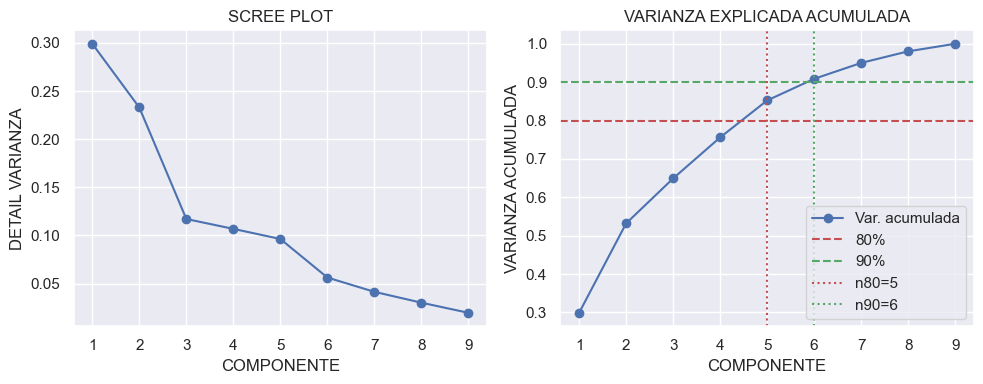

In [13]:
# PCA CON EL TOTAL PRINCIPAL
pca_full = PCA(n_components=X_scaled_pca.shape[1]).fit(X_scaled_pca)
var_ratio = pca_full.explained_variance_ratio_
cumvar = np.cumsum(var_ratio)

# SELECCION DISCRIMINACION
n80 = int(np.argmax(cumvar >= 0.80) + 1)
n90 = int(np.argmax(cumvar >= 0.90) + 1)

print("EXPLICACION DE VARIANZA POR COMPONENTE:", np.round(var_ratio, 4))
print("EXPLICACION DE VARIANZA ACUMULADA:", np.round(cumvar, 4))
print(f"COMPONENTES MINIMOS PARA >=80%: {n80}")
print(f"COMPONENTES MINIMOS PARA >=90%: {n90}")

# Gráficos (Scree plot y varianza acumulada)
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(range(1, len(var_ratio)+1), var_ratio, 'o-', label='Var. explicada')
plt.xlabel('COMPONENTE')
plt.ylabel('DETAIL VARIANZA')
plt.title('SCREE PLOT')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(range(1, len(cumvar)+1), cumvar, 'o-', label='Var. acumulada')
plt.axhline(0.8, color='r', linestyle='--', label='80%')
plt.axhline(0.9, color='g', linestyle='--', label='90%')
plt.axvline(n80, color='r', linestyle=':', label=f'n80={n80}')
plt.axvline(n90, color='g', linestyle=':', label=f'n90={n90}')
plt.xlabel('COMPONENTE')
plt.ylabel('VARIANZA ACUMULADA')
plt.title('VARIANZA EXPLICADA ACUMULADA')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [14]:
# Reducir a 2 componentes principales (para visualización e interpretación)
pca = PCA(n_components=2)
X_pca_reduced = pca.fit_transform(X_scaled_pca)

print("VARIANZA POR COMPONENTE (2 PCs):")
print(np.round(pca.explained_variance_ratio_, 4))
print(f"Varianza acumulada explicada (2 PCs): {np.sum(pca.explained_variance_ratio_):.4f}")

pca_df = pd.DataFrame(data=X_pca_reduced, columns=['PC1', 'PC2'])
pca_df['comprar'] = y_pca.values

pca_df['decision'] = pca_df['comprar'].map({0: 'Alquilar', 1: 'Comprar'})
pca_df.head()

VARIANZA POR COMPONENTE (2 PCs):
[0.2991 0.2329]
Varianza acumulada explicada (2 PCs): 0.5321


,PC1,PC2,comprar,decision
0,1.321915,-0.222950,1,Comprar
1,1.147878,1.716967,0,Alquilar
2,0.090369,1.836066,1,Comprar
3,3.455898,-0.078279,0,Alquilar
4,0.916933,-1.184676,1,Comprar


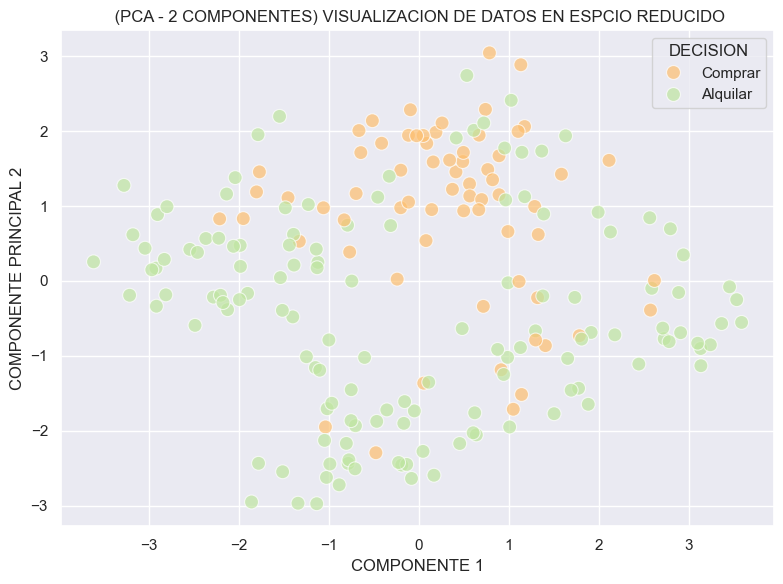

In [22]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='decision', data=pca_df, palette='Spectral', s=100, alpha=0.7)
plt.title(' (PCA - 2 COMPONENTES) VISUALIZACION DE DATOS EN ESPCIO REDUCIDO')
plt.xlabel('COMPONENTE 1')
plt.ylabel('COMPONENTE PRINCIPAL 2')
plt.legend(title='DECISION')
plt.tight_layout()
plt.show()

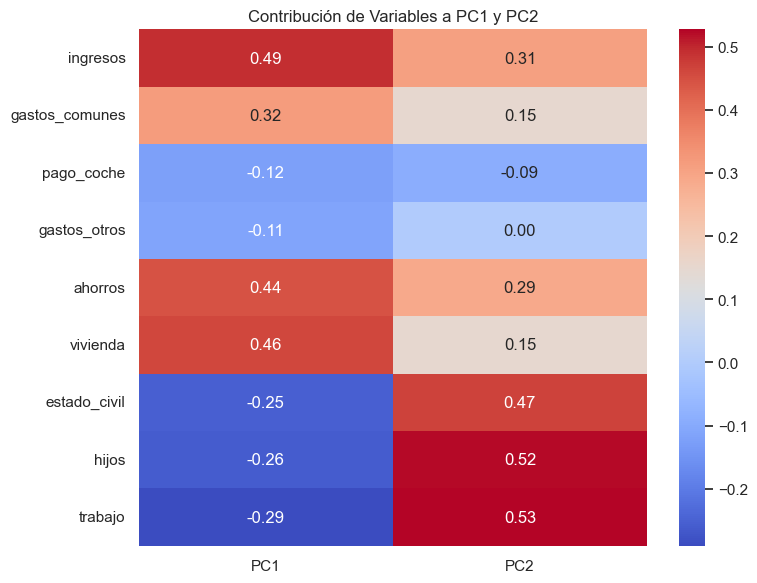

In [24]:
# Contribución (cargas) de cada variable a PC1 y PC2
components = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=X_pca.columns)

plt.figure(figsize=(8, 6))
sns.heatmap(components, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('PC1 PC2 CONTRIBUCION DE VARIABLES')
plt.tight_layout()
plt.show()

In [17]:
print("Contribución de cada variable a los componentes principales (cargas):")
components_df = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=X_pca.columns)
display(components_df.sort_values('PC1', key=lambda s: np.abs(s), ascending=False))

Contribución de cada variable a los componentes principales (cargas):


,PC1,PC2
ingresos,0.493720,0.306959
vivienda,0.462609,0.148985
ahorros,0.444650,0.288435
gastos_comunes,0.318229,0.147373
trabajo,-0.290248,0.527156
hijos,-0.259859,0.521894
estado_civil,-0.252279,0.469044
pago_coche,-0.123771,-0.091641
gastos_otros,-0.111876,0.000112


In [25]:
# Elige un umbral objetivo (0.8 para 80%)
explained_var_target = 0.80

n_opt = int(np.argmax(cumvar >= explained_var_target) + 1)
print(f"Con un umbral de {explained_var_target*100:.0f}%, n_components óptimo: {n_opt}")

pca_opt = PCA(n_components=n_opt)
X_pca_reduced_opt = pca_opt.fit_transform(X_scaled_pca)

print("Varianza explicada por componente (modelo óptimo):", np.round(pca_opt.explained_variance_ratio_, 4))
print("Varianza acumulada (modelo óptimo):", np.round(np.cumsum(pca_opt.explained_variance_ratio_), 4))

pca_df_opt = pd.DataFrame(X_pca_reduced_opt, columns=[f'PC{i+1}' for i in range(n_opt)])
pca_df_opt['comprar'] = y_pca.values
pca_df_opt.head()

Con un umbral de 80%, n_components óptimo: 5
Varianza explicada por componente (modelo óptimo): [0.2991 0.2329 0.1171 0.1069 0.0964]
Varianza acumulada (modelo óptimo): [0.2991 0.5321 0.6492 0.7561 0.8524]


,PC1,PC2,PC3,PC4,PC5,comprar
0,1.321915,-0.222950,1.599863,-0.885014,0.646617,1
1,1.147878,1.716967,0.395722,-0.447960,-0.687805,0
2,0.090369,1.836066,1.359382,0.337505,0.742387,1
3,3.455898,-0.078279,-0.202382,-1.573584,-0.068551,0
4,0.916933,-1.184676,0.190036,0.117804,-0.147753,1
